In [1]:
import os
os.chdir('../')

import DeepPurpose.property_pred as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *

from sklearn.metrics import mean_squared_error, roc_auc_score, average_precision_score, f1_score


In [2]:
def run_MPNN(fold_n, balanced):
    
    train = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/train.csv')
    dev = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/dev.csv')
    test = pd.read_csv('./aicures_data/train_cv/fold_'+str(fold_n)+'/test.csv')
    
    if balanced:
        # oversample balanced training
        train = pd.concat([train[train.activity == 1].sample(n = len(train[train.activity == 0]), replace=True), train[train.activity == 0]]).sample(frac = 1).reset_index(drop = True)
    
    X_train = train.smiles.values
    y_train = train.activity.values
    X_dev = dev.smiles.values
    y_dev = dev.activity.values
    X_test = test.smiles.values
    y_test = test.activity.values
    
    drug_encoding = 'MPNN'
    train = data_process(X_drug = X_train, y = y_train, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)

    val = data_process(X_drug = X_dev, y = y_dev, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)

    test = data_process(X_drug = X_test, y = y_test, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)
    
    config = generate_config(drug_encoding = drug_encoding, 
                         cls_hidden_dims = [512], 
                         train_epoch = 30, 
                         LR = 0.001, 
                         batch_size = 128,
                         hidden_dim_drug = 128,
                         mpnn_hidden_size = 128,
                         mpnn_depth = 3 
                        )
    
    model = models.model_initialize(**config)
    model.train(train, val, test)
    
    scores = model.predict(test)
    
    return roc_auc_score(test.Label.values, scores), average_precision_score(test.Label.values, scores), scores, test.Label.values

Drug Property Prediction Mode...
in total: 3330 drugs
encoding drug...
unique drugs: 1694
drug encoding finished...
do not do train/test split on the data for already splitted data
assert here
Drug Property Prediction Mode...
in total: 202 drugs
encoding drug...
unique drugs: 202
drug encoding finished...
do not do train/test split on the data for already splitted data
assert here
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
assert here
train type <class 'pandas.core.frame.DataFrame'>
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69367. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.93693 , AUPRC: 0.86183 , F1: 0.16969
Training at Epoch 2 iteration 0 with loss 0.64054. Total time 0.00138 hours
Validation at Epoch 2 , AUROC: 0.94414 , AUPRC: 0.74861 , F1: 0.26804
Training at Epoch 3 it

Validation at Epoch 5 , AUROC: 0.82307 , AUPRC: 0.32102 , F1: 0.23255
Training at Epoch 6 iteration 0 with loss 0.25469. Total time 0.00694 hours
Validation at Epoch 6 , AUROC: 0.89658 , AUPRC: 0.35671 , F1: 0.20408
Training at Epoch 7 iteration 0 with loss 0.23292. Total time 0.00833 hours
Validation at Epoch 7 , AUROC: 0.93931 , AUPRC: 0.36902 , F1: 0.19047
Training at Epoch 8 iteration 0 with loss 0.22369. Total time 0.00944 hours
Validation at Epoch 8 , AUROC: 0.91025 , AUPRC: 0.37988 , F1: 0.34482
Training at Epoch 9 iteration 0 with loss 0.12022. Total time 0.01083 hours
Validation at Epoch 9 , AUROC: 0.90769 , AUPRC: 0.45218 , F1: 0.33333
Training at Epoch 10 iteration 0 with loss 0.05365. Total time 0.01222 hours
Validation at Epoch 10 , AUROC: 0.94786 , AUPRC: 0.62218 , F1: 0.33333
--- Go for Testing ---
Testing AUROC: 0.5126262626262627 , AUPRC: 0.2668060918060918 , F1: 0.28571428571428575
--- Training Finished ---
predicting...
Drug Property Prediction Mode...
in total: 3312

drug encoding finished...
do not do train/test split on the data for already splitted data
assert here
train type <class 'pandas.core.frame.DataFrame'>
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69570. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.87436 , AUPRC: 0.18699 , F1: 0.13333
Training at Epoch 2 iteration 0 with loss 0.53302. Total time 0.00138 hours
Validation at Epoch 2 , AUROC: 0.92512 , AUPRC: 0.22453 , F1: 0.19999
Training at Epoch 3 iteration 0 with loss 0.44113. Total time 0.00277 hours
Validation at Epoch 3 , AUROC: 0.97208 , AUPRC: 0.46442 , F1: 0.17021
Training at Epoch 4 iteration 0 with loss 0.42654. Total time 0.00472 hours
Validation at Epoch 4 , AUROC: 0.97842 , AUPRC: 0.52857 , F1: 0.23529
Training at Epoch 5 iteration 0 with loss 0.31506. Total time 0.00638 hours
Validation at Epoch 5 , AUROC: 0.98857 , AUPRC: 0.69507 , F1: 0.19047
Training at Epoch 6 iteration 0 with loss 0.29040. Total

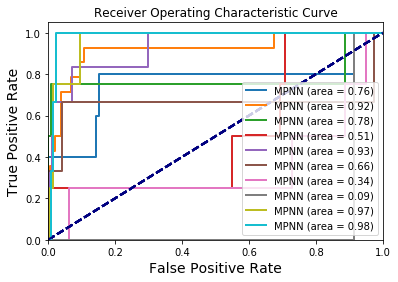

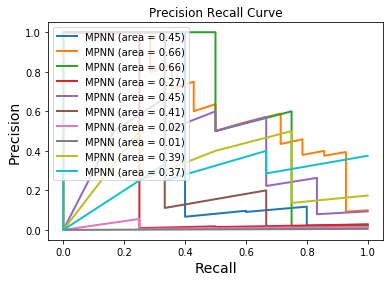

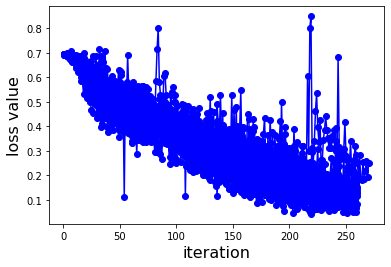

In [4]:
roc_ = []
prc_ = []
scores_ = []
labels_ = []

drug_encoding = 'MPNN'

for i in range(10):
    roc, prc, scores, labels = eval('run_' + drug_encoding + '(i, True)')
    roc_.append(roc)
    prc_.append(prc)
    scores_.append(scores)
    labels_.append(labels)
    
print('ROC-Mean {:.4f}'.format(np.mean(np.array(roc_))))
print('ROC-STD {:.4f}'.format(np.std(np.array(roc_))))
print('PRC-Mean {:.4f}'.format(np.mean(np.array(prc_))))
print('PRC-STD {:.4f}'.format(np.std(np.array(prc_))))

with open('./scores_aicures/' + drug_encoding + '_score.pkl', 'wb') as f:
    pickle.dump(scores_, f, pickle.HIGHEST_PROTOCOL)
